## Chapter 8

### Class Activation Maps (CAM)

##### We will look at the explanations provided through these methods

This notebook focusses on Class Activation Maps. We use the pretrained resnet18 model from torchvision.

There is a file imagenet_class_index.json which has the labels for the model <br>

Original source for this notebook is from the Torchcam library - https://github.com/frgfm/torch-cam

**Install all required libraries**

In [5]:

!pip install torchvision matplotlib
!pip install torchcam

  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 16.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   - -------------------------------------- 5.2/203.0 MB 24.5 MB/s eta 0:00:09
   --- ------------------------------------ 19.1/203.0 MB 46.5 MB/s eta 0:00:04
   ----- ---------------------------------- 26.0/203.0 MB 42.2 MB/s eta 0:00:05
   ------ --------------------------------- 30.9/203.0 MB 37.0 MB/s eta 0:00:05
   ------ --------------------------------- 32.2/203.0 MB 30.6 MB/s eta 0:00:06
   ------ --------------------------------- 33.0/203.0 MB 26.6 MB/s eta 0:00:07
   ------ --------------------------------- 34.1/203.0 MB 22.5 MB/s eta 0:00:08
   ------ --------------------------------- 34.9/203.0 MB 20.9 MB/s eta 0:00:09
   ------- -------------------------------- 35.9/203.0 MB 19.0 MB/s eta 0:00:09
 

**Load the image in the current location**

In [34]:
# Download an image 
#url = https://www.woopets.fr/assets/races/000/066/big-portrait/border-collie.jpg

import requests

url = "https://www.woopets.fr/assets/img/021/903/1200x675/gerer-poids-chat.jpg"
#url = 'https://www.woopets.fr/assets/ckeditor/2025/jan/actualities/42088/xl/my-wife-and-kid-went-to-pick-up-pizza-v0-hlapvuosrh8e1.jpg'
#response = requests.get(url)

#with open('image.jpg', 'wb') as f:
#    f.write(response.content)


# Define the image path
# Set this to your image path if you wish to run it on your own data
img_path = "border-collie.jpg"
#img_path = "image.jpg"


In [35]:
import torch
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image
from IPython.display import display


# Read the image
img = read_image(img_path)

# Convert the tensor image to a PIL image and display it
img_pil = to_pil_image(img)
display(img_pil)

RuntimeError: Unsupported image file. Only jpeg, png and gif are currently supported.

**Import the required torch libraries, using the pretrained Resnet18 model instantiate the CAM on the loaded model**

In [20]:
%matplotlib inline

# All imports
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import softmax, interpolate
from torchvision.io.image import read_image
from torchvision.models import resnet18
from torchvision.transforms.functional import normalize, resize, to_pil_image

from torchcam.methods import CAM
from torchcam.utils import overlay_mask

model = resnet18(pretrained=True).eval()
cam = CAM(model, 'layer4', 'fc')


# Get your input
img = read_image(img_path)
# Preprocess it for your chosen model
#input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Preprocess your data and feed it to the model
#out = model(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
#cams = cam_extractor(out.squeeze(0).argmax().item(), out)


c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: Unsupported image file. Only jpeg, png and gif are currently supported.

In [ ]:

with torch.no_grad(): 
    out = model(input_tensor.unsqueeze(0))
    # Assuming you want the CAM for the class with the highest score
    class_idx = out.argmax().item()
    activation_map = cam(class_idx)

**Visualize the class activation map (CAM), the sections contributing to the image classification**

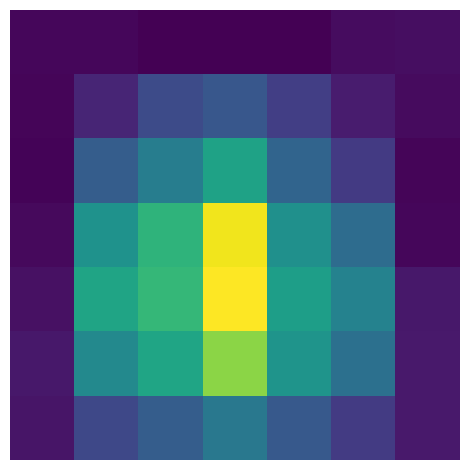

In [8]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

**Visualize the class activation map (CAM), the sections contributing to the image classification overlaid on original image**

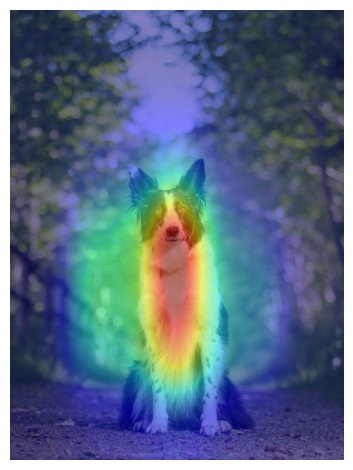

: 

In [10]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

As seen abive, the highlighted portion of the image is largely focussed on the head and body of the dog which determines image class prediction which is insync with a human observer.